In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [62]:
# Show current directory
!ls -al "/content/gdrive/Shared drives/기계학습(2020-2학기)/ML Report/Biweelky Report (11 Nov)/EDA/"

total 2368
-rw------- 1 root root  173148 Nov  5 13:42 'label analysis.ipynb'
drwx------ 2 root root    4096 Nov  5 13:12  train_mask_gif
-rw------- 1 root root 2246614 Dec 11  2019  train_masks.csv


In [63]:
# label = pd.read_csv('/train_masks.csv')

# Set current path in google drive
label = pd.read_csv('/content/gdrive/Shared drives/기계학습(2020-2학기)/ML Report/Biweelky Report (11 Nov)/EDA/train_masks.csv')


'train_masks.csv' is consisted of subejct, img and pixels. 

- **subject** : The training data is consisted of ultrasound images that 47 people took.
- **img** : Each person took 120 images.
- **pixels** : Ground truth which is encoded. Some of data don't have label because the image was took in wrong place or potentially annotator did mistake.

In [64]:
label

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN
...,...,...,...
5630,47,116,NaN
5631,47,117,99299 25 99714 38 100128 48 100546 56 100964 6...
5632,47,118,NaN
5633,47,119,NaN


Total 5365 data.  
We found that almost half of data don't have ground truth.

- Number of data with label : 2323  
- Number of data without label : 3312

In [65]:
# Column of pixels has 2323 non-null 
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB


In [66]:
# Number of NaN in column of pixels.
label.pixels.isna().sum()

3312

We analysed relationship between missing label and subject.

In [67]:
label_missing = label.groupby('subject').count()

In [68]:
label_missing['missing'] = label_missing['img'] - label_missing['pixels']

In [69]:
label_missing.head()

,img,pixels,missing
subject,,,
1,120,54,66
2,120,11,109
3,119,51,68
4,120,33,87
5,120,32,88


By plotting, we found thata there is large variance missing label according to subject.  
It was hard to find any pattern on missing label and subject with eyes.

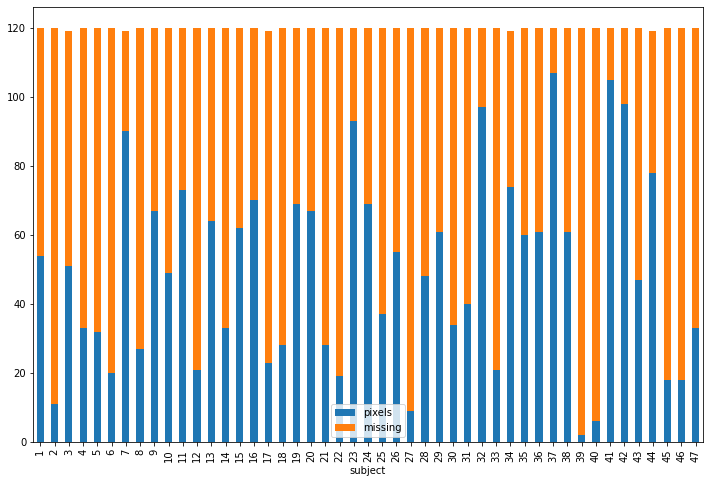

In [70]:
label_missing.drop(columns='img').plot(figsize=(12,8), kind='bar', stacked=True)

In [71]:
# missing std 27
label_missing.describe()

,img,pixels,missing
count,47.000000,47.000000,47.000000
mean,119.893617,49.425532,70.468085
std,0.311661,27.836280,27.891756
min,119.000000,2.000000,13.000000
25%,120.000000,27.500000,52.000000
50%,120.000000,49.000000,71.000000
75%,120.000000,68.000000,92.500000
max,120.000000,107.000000,118.000000


We also analysed relationship between missing label and img.

In [72]:
label_img_missing = label.groupby('img').count()

In [73]:
label_img_missing['missing'] = label_img_missing['subject'] - label_img_missing['pixels']

In [74]:
label_img_missing.head()

,subject,pixels,missing
img,,,
1,47,23,24
2,47,24,23
3,47,25,22
4,47,21,26
5,47,23,24


By plotting, we found that there was low variance according to img index(actually video frame).  
Missing labels were lied in img index as similar portion.

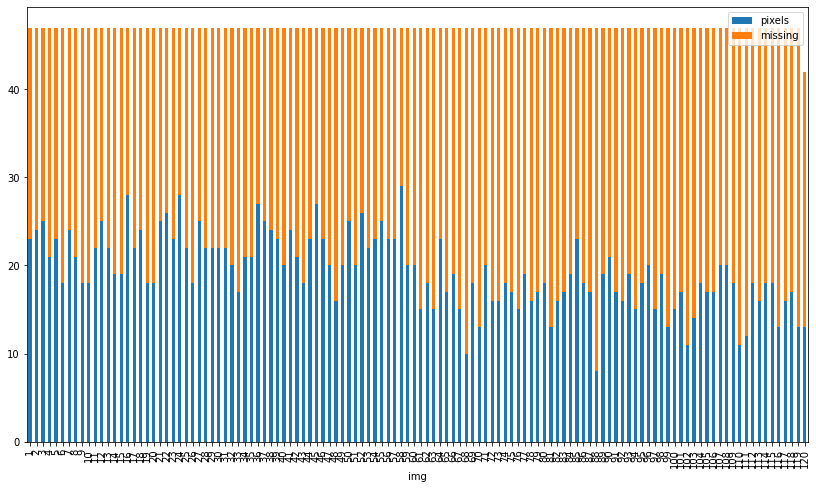

In [75]:
label_img_missing.drop(columns='subject').plot(figsize=(14,8), kind='bar', stacked=True)

In [76]:
# missing std = 4
label_img_missing.describe()

,subject,pixels,missing
count,120.000000,120.000000,120.000000
mean,46.958333,19.358333,27.600000
std,0.456435,4.107374,4.067498
min,42.000000,8.000000,18.000000
25%,47.000000,17.000000,24.750000
50%,47.000000,19.000000,28.000000
75%,47.000000,22.250000,30.000000
max,47.000000,29.000000,39.000000


Finally we doubted a relationship between missing label and img order(actually video frame order).  
Our hypothesis was that there is a pattern of missing label in time sequence.

In [77]:
label.pivot('subject', 'img', 'pixels').applymap(lambda x: 1 if isinstance(x, str) else 0)

img,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,1,1,0,1,0,0,0
4,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,0,0,1,1,1,0,...,1,1,1,0,1,1,1,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0
8,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1


In [78]:
label_frequency_missing = label.pivot('subject', 'img', 'pixels').applymap(lambda x: 1 if isinstance(x, str) else 0).values

We ploted a heatmap to see any pattern on it.  
X-axis is subject and Y-axis is video frames in time order.  
Missing labels were represented in black.  
But We couldn't find any pattern on this heatmap by eyes.

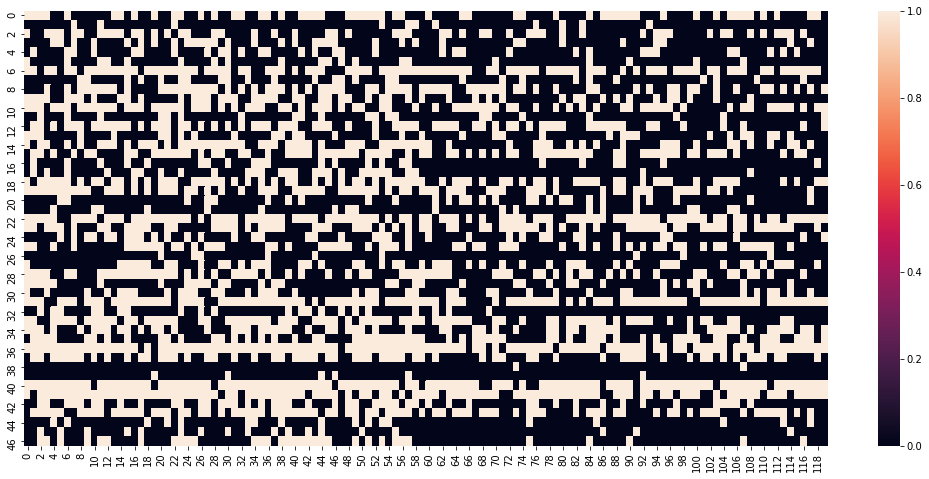

In [79]:
plt.figure(figsize=(18,8))
sns.heatmap(label_frequency_missing)